# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju

- Nama: Agung Firmansyah
- Email: agungfir98@gmail.com
- Id Dicoding: agung_firmansyah98

## Persiapan

### Menyiapkan library yang dibutuhkan

In [18]:
# system dependencies
import os
from dotenv import load_dotenv

# data dependencies
import pandas as pd
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns

### Menyiapkan data yang akan diguankan

## Data Understanding

### Employee Data

The data contains demographic details, work-related metrics and attrition flag.

* **EmployeeId** - Employee Identifier
* **Attrition** - Did the employee attrition? (0=no, 1=yes)
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Daily salary
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Hourly salary
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly salary
* **MonthlyRate** - Mounthly rate
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager


In [19]:
df = pd.read_csv("employee-data.csv")
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [ ]:
df.dropna(inplace=True)

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [22]:
df['Attrition'] = df['Attrition'].astype(int)

In [24]:
columns_to_drop = ["EmployeeId", "EmployeeCount", "StandardHours", "Over18"]
df.drop(columns=columns_to_drop, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EnvironmentSatisfaction   1058 non-null   int64 
 9   Gender                    1058 non-null   object
 10  HourlyRate                1058 non-null   int64 
 11  JobInvolvement            1058 non-null   int64 
 12  JobLevel                  1058 non-null   int64 
 13  JobRole                   1058 non-null   object
 14  JobSatisfaction           105

### mengekspor data ke postgresql untuk keperluan dashboard

In [26]:
load_dotenv(".env")

DB_URL = os.getenv("DB_URL")
engine = create_engine(DB_URL)

clean_df = df.copy()
clean_df.to_sql("employees", con=engine.connect(), if_exists="replace")

58

### Exploratory Data Analysis

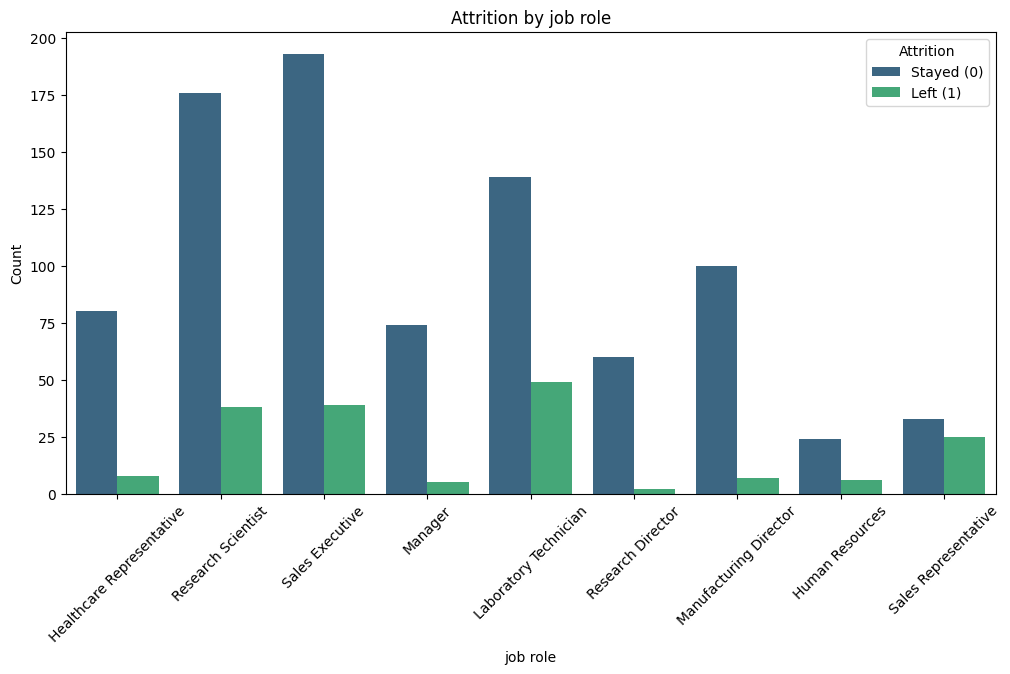

In [28]:
plt.figure(figsize=(12,6))

sns.countplot(data=clean_df, x="JobRole", hue="Attrition", palette="viridis")

plt.xticks(rotation=45)
plt.xlabel("job role")
plt.ylabel("Count")
plt.title("Attrition by job role")
plt.legend(title="Attrition", labels=["Stayed (0)", "Left (1)"])
plt.show()

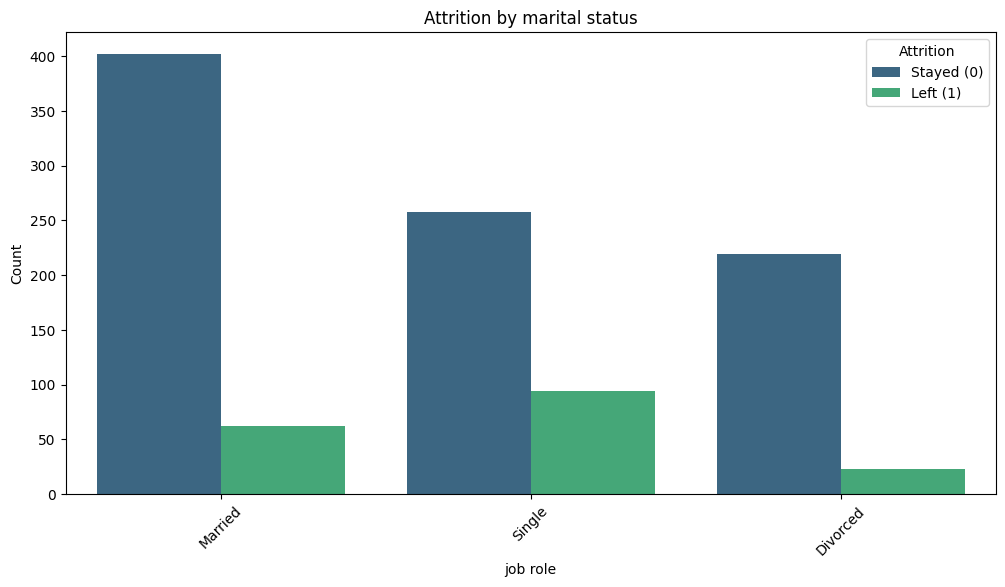

In [29]:
plt.figure(figsize=(12,6))

sns.countplot(data=clean_df, x="MaritalStatus", hue="Attrition", palette="viridis")

plt.xticks(rotation=45)
plt.xlabel("job role")
plt.ylabel("Count")
plt.title("Attrition by marital status")
plt.legend(title="Attrition", labels=["Stayed (0)", "Left (1)"])
plt.show()

## Data Preparation / Preprocessing

## Modeling

## Evaluation